# 패키지 로딩

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd

# 데이터 로딩

In [2]:
x, y = load_iris(return_X_y=True)

In [4]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 데이터 표준화

In [3]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

# 주성분 분석
4차원 --> 2차원

In [4]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)

In [7]:
np.set_printoptions(suppress= True, precision=3)

In [5]:
iris_pca = model.fit_transform(x_scaled)
print(iris_pca.shape)
print(iris_pca)

(150, 2)
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66

# 주성분 값 확인

In [9]:
df_pca_iris = pd.DataFrame(iris_pca, columns=['PCA1', 'PCA2'])
df_pca_iris['class'] = load_iris().target
df_pca_iris

,PCA1,PCA2,class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


# 2개 차원으로 데이터 시각화

In [10]:
load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

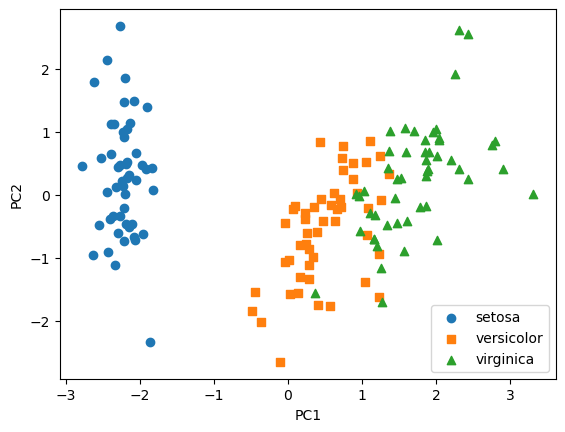

In [11]:
import matplotlib.pyplot as plt
marker = ['o','s','^']
for i,m in enumerate(marker):
    xdata = df_pca_iris[df_pca_iris['class']==i]['PCA1']
    ydata = df_pca_iris[df_pca_iris['class']==i]['PCA2']
    plt.scatter(xdata, ydata, marker= m, label = load_iris().target_names[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

- 꽃받침의 길이와 넓이 데이터로 시각화 (비교)

In [12]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data[:,[0,1]], columns=iris.feature_names[:2])
iris_df['class']= iris.target
iris_df

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


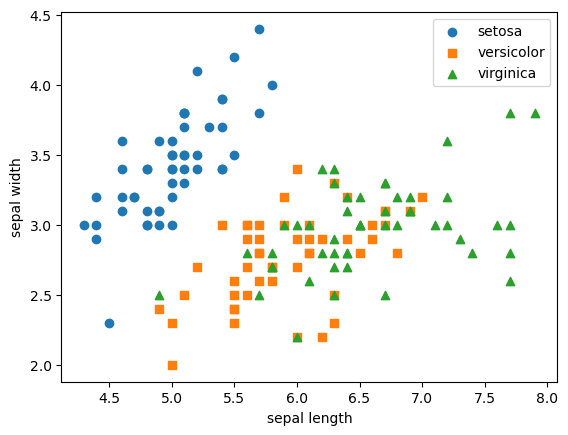

In [13]:
for i,m in enumerate(marker):
    xdata = iris_df[iris_df['class']==i]['sepal length (cm)']
    ydata = iris_df[iris_df['class']==i]['sepal width (cm)']
    plt.scatter(xdata, ydata, marker= m, label = load_iris().target_names[i])

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

# PCA에 따른 각각의 PCA가 차지하는 변동성(분산) 확인

In [14]:
print(model.explained_variance_ratio_)
print(f'분산합계 {100*np.sum(model.explained_variance_ratio_):.3f}%')


[0.73  0.229]
분산합계 95.813%


# 주성분의 적절한 차원의 수

- 분산의 합계 수를 얼마나 할지..?

In [6]:
model = PCA() #따로 지정하지 아니하면 독립변수의 개수만큼 주성분을 만듦
model.fit(x_scaled)

cumsum = np.cumsum(model.explained_variance_ratio_)
d = np.argmax(cumsum>0.8)+1
print(d)

2


In [9]:
model = PCA() #따로 지정하지 아니하면 독립변수의 개수만큼 주성분을 만듦
model.fit(x_scaled)

PCA()

In [6]:
model.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [7]:
np.cumsum(model.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [8]:
np.cumsum(model.explained_variance_ratio_) >0.8

array([False,  True,  True,  True])

In [5]:
import numpy as np
np.argmax([False,  True,  False,  True])

1

In [12]:
help(np.argmax)

Help on function argmax in module numpy:

argmax(a, axis=None, out=None)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmax, argmin
    amax : The maximum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    take_along_axis : Apply ``np.expand_dims(index_array, axis)``
                      from argmax to an array as if by calling max.
    
    Notes
    ----

In [11]:
np.argmin(np.cumsum(model.explained_variance_ratio_) >0.8)

0

In [10]:
np.where(np.cumsum(model.explained_variance_ratio_) >0.8)

(array([1, 2, 3], dtype=int64),)

In [16]:
cumsum

array([0.73 , 0.958, 0.995, 1.   ])

In [17]:
help(np.cumsum)

Help on function cumsum in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See :ref:`ufuncs-output-type` for

# 주성분 수 선택을 위한 스크릿 플롯 그리기

In [16]:
import matplotlib.pyplot as plt

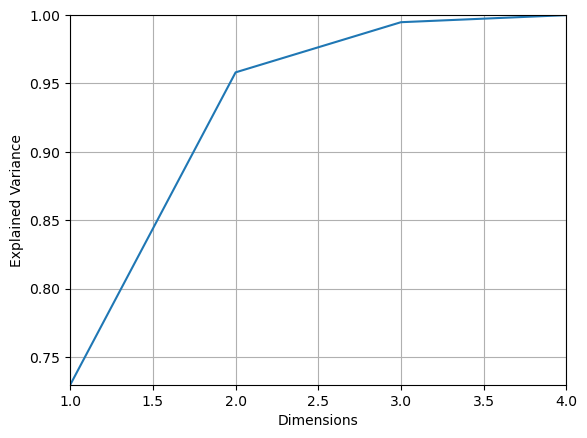

In [19]:
plt.plot(np.arange(1,5), cumsum)
plt.axis([1,4,cumsum[0], 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# PCA 성능 비교
- 원본데이터와 PCA가 적용된 데이터를 활용한 분류 알고리즘(Random Forest) 적용

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model1 = RandomForestClassifier(random_state=0)
score = cross_val_score(model1, x_scaled, y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:', score)
print('교차 검증별 평균 정확도:', np.round(np.mean(score),2))

교차 검증별 정확도: [0.967 0.967 0.933 0.967 1.   ]
교차 검증별 평균 정확도: 0.97


In [23]:
model2 = RandomForestClassifier(random_state=0)
score = cross_val_score(model2, iris_pca, y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:', score)
print('교차 검증별 평균 정확도:', np.round(np.mean(score),2))

교차 검증별 정확도: [0.833 0.933 0.833 0.9   1.   ]
교차 검증별 평균 정확도: 0.9
